In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#return data frame with no null values
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
#split into train and test datasets
from sklearn.model_selection import train_test_split

#set x and y
X = data.drop(['median_house_value'], axis = 1) #prints dataframe without m_h_v column
y = data['median_house_value'] #prints only that column


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #only using 20% of the data

In [12]:
train_data = X_train.join(y_train) #combined dataframe for the train data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

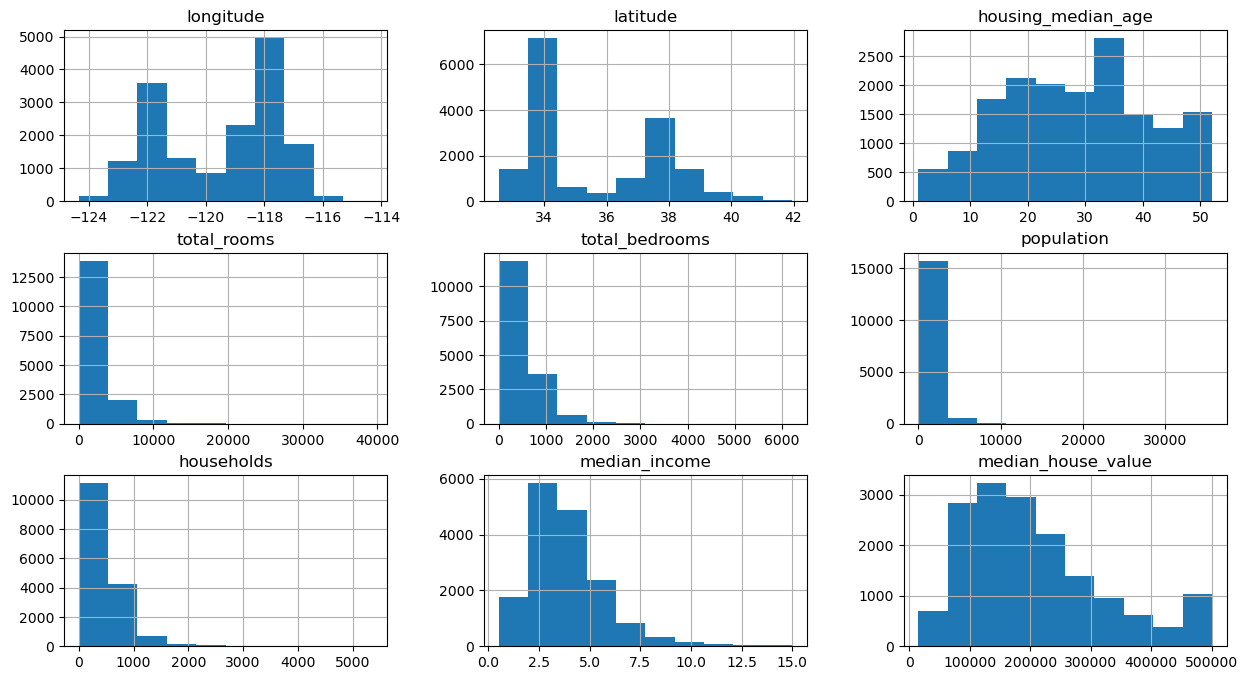

In [13]:
train_data.hist(figsize=(15,8)) #histogram for distribution of each feature

<Axes: >

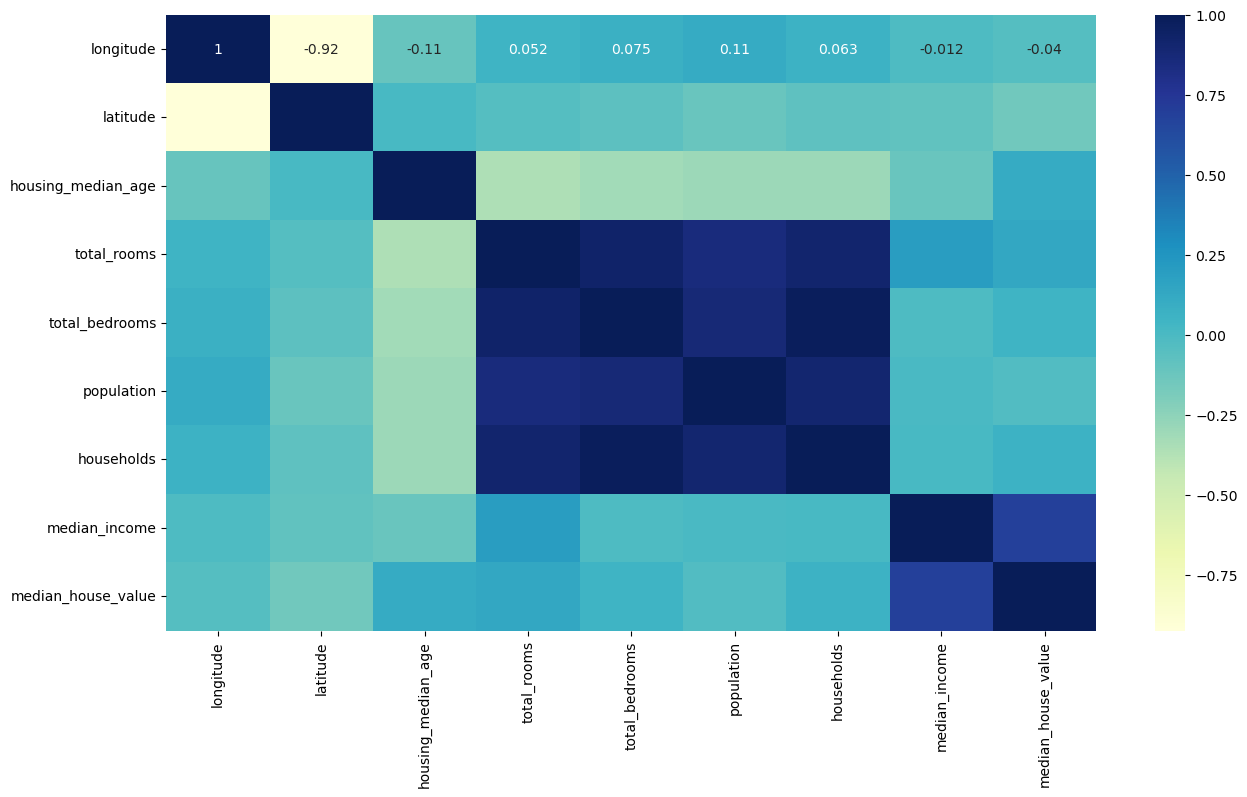

In [14]:
#train_data.corr() shows a correlation matrix between all of the features
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True, cmap = "YlGnBu") 

In [15]:
#we can see that median income quite heavily correlates with median house value
#latitude is negatively correlated with median house value
#end of data exploration

In [16]:
#data preprocessing
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

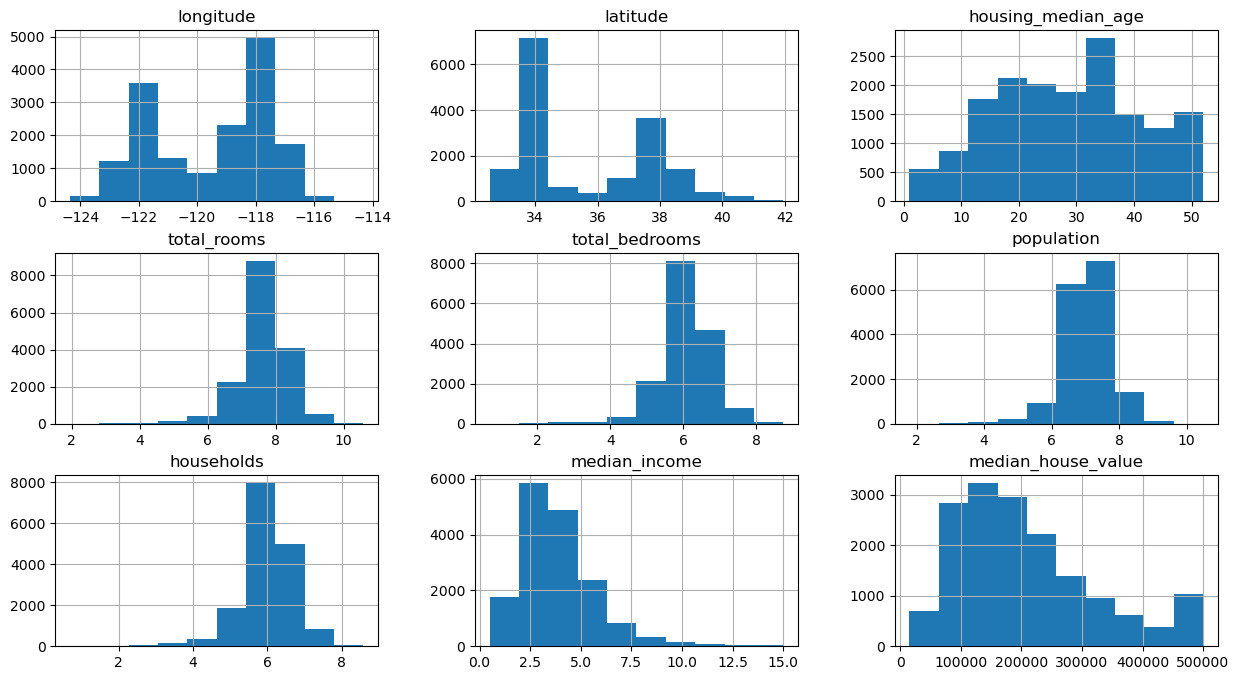

In [17]:
train_data.hist(figsize=(15,8))

In [18]:
#convert categories of ocean proximity into binary numerical values, then join that data with the dataframe and remove the ocean proximity column
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7388,-118.25,33.96,43.0,7.537430,6.120297,7.360104,6.129050,2.0323,112500.0,True,False,False,False,False
17195,-119.75,34.45,26.0,8.182839,6.519147,7.316548,6.428105,4.1375,395000.0,False,False,False,False,True
11575,-118.00,33.77,28.0,7.784057,6.222576,7.052721,6.124683,3.5139,211700.0,True,False,False,False,False
7320,-118.18,33.99,36.0,6.896694,5.823046,7.319202,5.863631,2.4375,154800.0,True,False,False,False,False
10756,-117.90,33.61,44.0,7.293018,5.746203,6.230481,5.587249,3.4937,500001.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,-118.48,35.14,4.0,9.038128,7.413367,8.440744,7.292337,3.6949,115800.0,False,True,False,False,False
14583,-117.18,32.84,30.0,7.736744,6.261492,7.149132,6.159095,3.5606,165100.0,False,False,False,False,True
14525,-117.13,32.92,16.0,7.684324,5.991465,7.286876,5.976351,4.2614,169600.0,True,False,False,False,False
8049,-118.17,33.83,45.0,7.610853,5.897154,6.781058,5.828946,4.1023,217300.0,False,False,False,False,True


<Axes: >

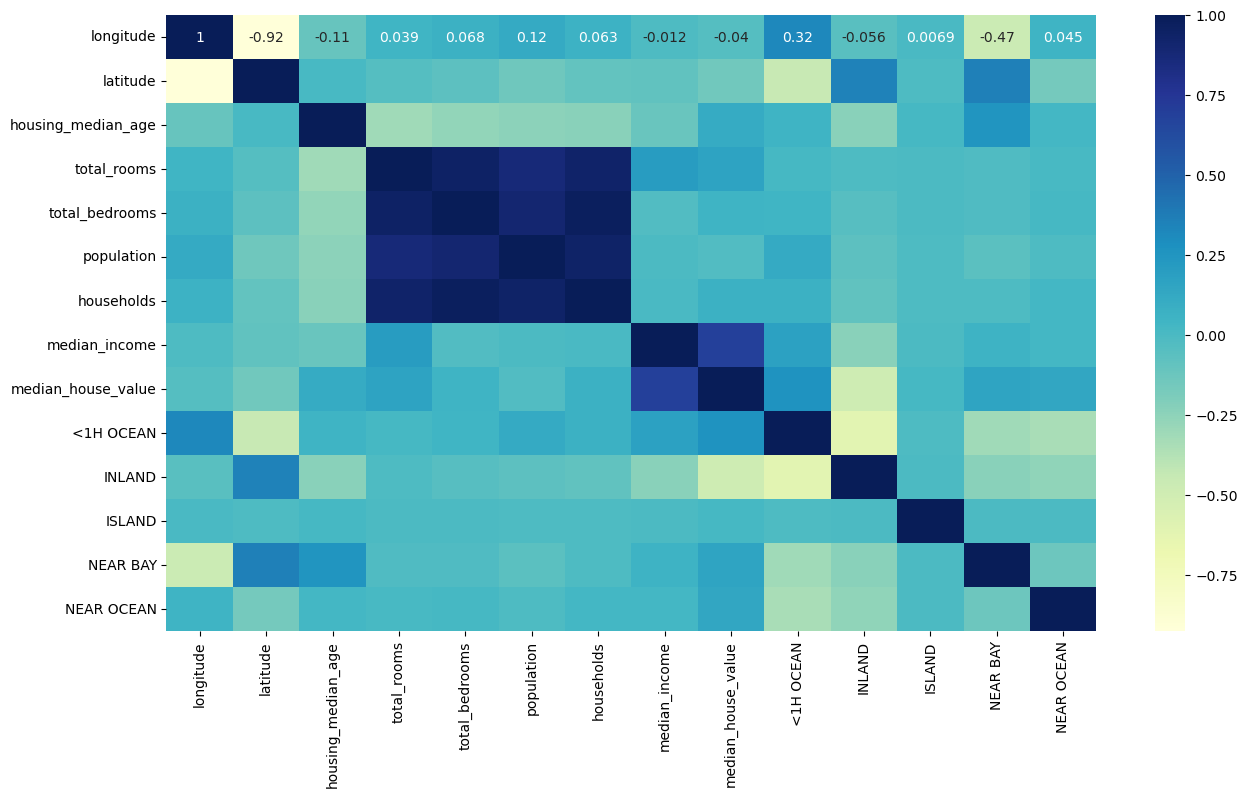

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True, cmap = "YlGnBu") 

In [20]:
#inland has a negative correlation with median house value, so you'd pay a lower price for a house if you live inland
#<1 hour away from the ocean yields a higher house value

<Axes: xlabel='latitude', ylabel='longitude'>

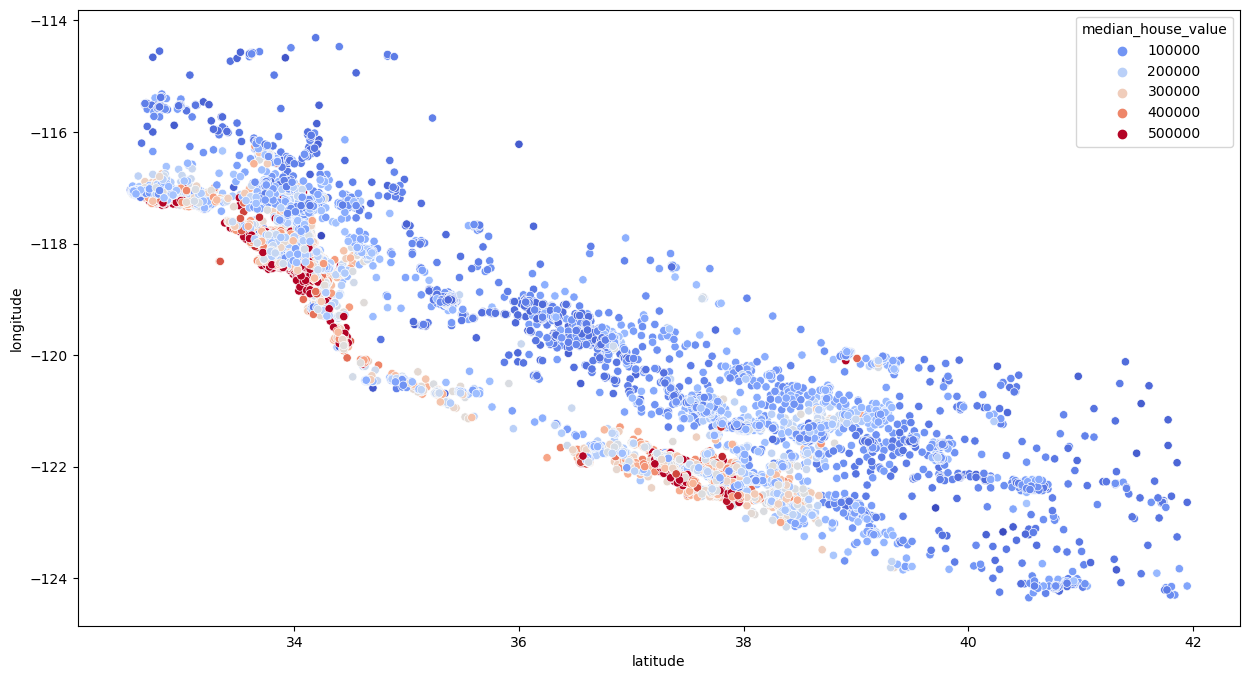

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

In [22]:
#the houses on the coast are more expensive (red dots)

In [23]:
#feature engineering
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms'] #how many rooms are bedrooms
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households'] #rooms in a household

<Axes: >

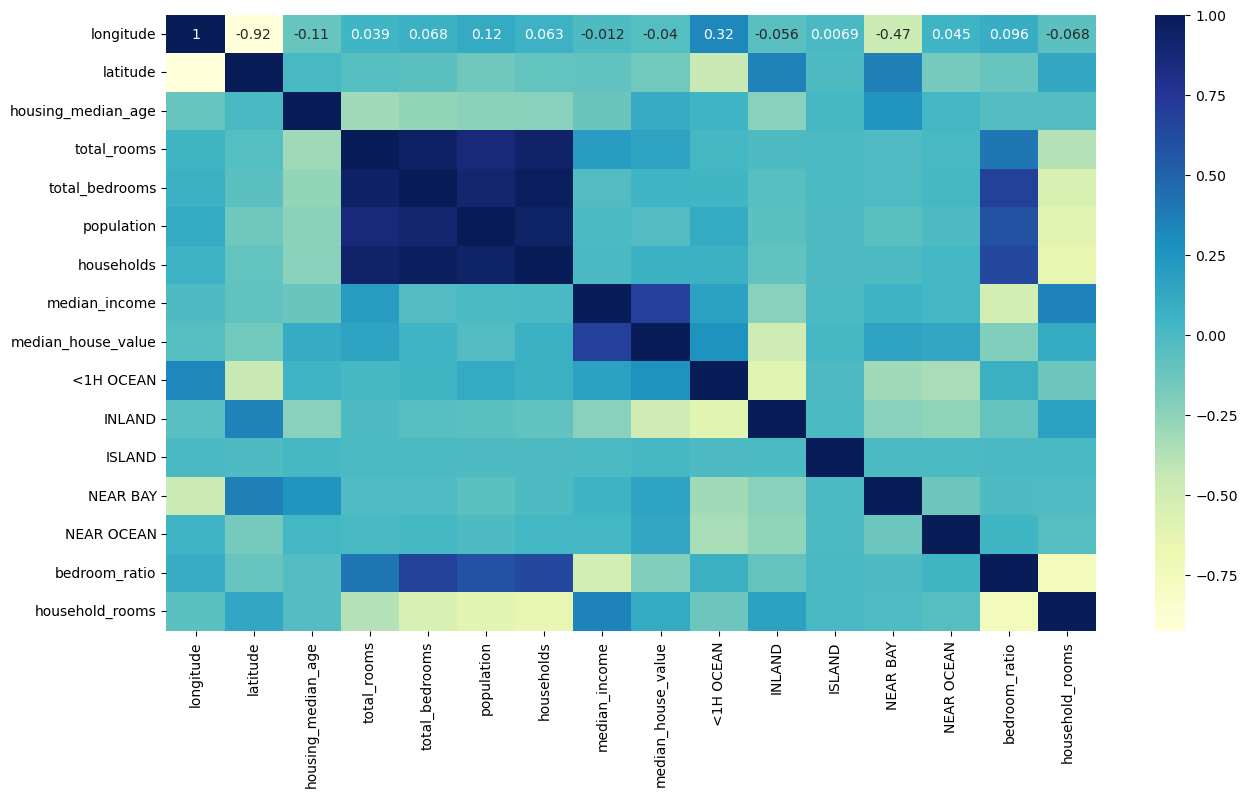

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True, cmap = "YlGnBu")

In [25]:
#bedroom_ratio has negative correlation with median house value per block
#adding these two features gives us more interesting results

In [26]:
#linear regression model
from sklearn.linear_model import LinearRegression

#drop target variable
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [27]:
test_data = X_test.join(y_test) #combined dataframe for the train data

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms'] 
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [28]:
X_test, y_tets = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [29]:
reg.score(X_test, y_test)

0.658682167822004

In [30]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
forest.score(X_test, y_test)

0.8135559800704599

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
best_forest = grid_search.best_estimator_

In [34]:
best_forest.score(X_test, y_test)

0.8144905523013389

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error

# Predicting the target variable on the test set using the trained model
y_pred = forest.predict(X_test) 

# Calculate R-squared score (accuracy for regression)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.8136
